<a href="https://colab.research.google.com/github/Munna-Prasad-Gupta/Data-Science/blob/main/TopicModeling_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Clear up data in global environment
rm(list=ls())

# Load data from csv file
df <- read.csv("Final_Comments_Data.csv")

# Check for NAs
sapply(df, function(x) sum(is.na(x)))

# Overview of original dataset
str(df)
sapply(df, typeof)

Comment   Website Sentiment   company 
        0         0         0         0

'data.frame':	1803 obs. of  4 variables:
 $ Comment  : chr  "I think you don’t follow the latest trends. I live in a Tier 2 city and have had fiber connectivity here for th"| __truncated__ "It would be great if they offered an unlimited 5G plan." "5G is not fully ready, but it’s ready to be fast.  I haven't received it in my area yet" "I left my 30Mbps Jio Fiber WiFi to use Jio 5G." ...
 $ Website  : chr  "youtube" "youtube" "youtube" "youtube" ...
 $ Sentiment: int  1 -1 -1 1 1 1 -1 -1 1 1 ...
 $ company  : chr  "Jio" "Jio" "Jio" "Jio" ...


Comment     Website   Sentiment     company 
"character" "character"   "integer" "character"

In [10]:
df[sample(nrow(df), 10), ]

,Comment,Website,Sentiment,company
,<chr>,<chr>,<int>,<chr>
1525,"RT ESL: RT ESLPUBGMobile: Smokes, cars and chicken dinners aplenty.... Q3 of the Vodafone 5G #ESLMobileOpen June Cup was pure 🔥. verdipwnz takes us through this week's top plays! https://t.co/YI9jVT77bc",twitter,1,Vodafone
616,"Good, but not exceptional.",survey,1,Jio
1581,VODAFONE #5G IS NOW LIVE 🎉Thanks to @LewisHamilton for officially switching on our 5G network!#5Gamechanger https://t.co/wXCn2EGiPe,twitter,-1,Vodafone
1337,Great service overall.,survey,1,Airtel
623,"Good quality, but coverage can be limited.",survey,1,Jio
1598,"CONCALL UPDATES FROM VODAFONE IDEA Q1 FY25CO. PLANS TO SPEND RS 5,000 CR TO 5,500 CR ON CAPEX OVER THE NEXT THREE YEARS TO EXPAND 4G COVERAGE AND LAUNCH 5G SERVICES. CO EXPECTS A 15% INCREASE IN DATA CAPACITY BY END OF SEPT '24 BENEFICIARY FROM THIS CAPEX : SUYOG…",twitter,-1,Vodafone
841,Same here in Ranchi.,youtube,-1,Airtel
683,Service quality is disappointing.,survey,-1,Jio
1143,@airtelnews Poor Worst service provider #airtelindia @Airtel_Presence @airtelindia @airtelnews @DoT_India @TRAI @consumerforum @PMOIndia @JM_Scindia,twitter,-1,Airtel


In [7]:
# Install 'stm' package if not already installed
install.packages("stm")
install.packages("tm")
install.packages("SnowballC")

# Load 'stm' library
# Load required libraries
library(tm)
library(SnowballC)
library(stm)


# Load the dataset
df <- read.csv("Final_Comments_Data.csv")

# Perform text processing on the 'Comment' column
processed <- textProcessor(df$Comment, metadata = df,
                           lowercase = TRUE,           # Convert to lowercase
                           removestopwords = TRUE,     # Remove stop words
                           removenumbers = TRUE,       # Remove numbers
                           removepunctuation = TRUE,   # Remove punctuation
                           stem = TRUE,                # Apply stemming
                           wordLengths = c(3, Inf),    # Keep words of length 3 or more
                           sparselevel = 1,            # Keep all words (no sparsity cutoff)
                           language = "en",            # English language
                           verbose = TRUE,             # Display detailed output
                           onlycharacter = TRUE,       # Keep only alphabetic characters
                           striphtml = FALSE,          # Do not remove HTML tags (no HTML in the data)
                           customstopwords = NULL,     # No custom stopwords
                           v1 = FALSE)                 # Use the default version of textProcessor

# Output the result of the text processing
str(processed)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: NLP



Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
List of 4
 $ documents   :List of 1797
  ..$ 1   : int [1:2, 1:15] 522 1 741 2 1127 1 1327 1 1355 1 ...
  ..$ 2   : int [1:2, 1:4] 1485 1 2328 1 2477 1 3365 1
  ..$ 3   : int [1:2, 1:7] 205 1 1308 1 1386 1 1546 1 2655 2 ...
  ..$ 4   : int [1:2, 1:6] 1327 1 1770 2 1943 1 2095 1 3396 1 ...
  ..$ 5   : int [1:2, 1:6] 1023 1 1266 1 2271 1 3079 1 3532 1 ...
  ..$ 6   : int [1:2, 1:21] 17 1 21 1 381 1 741 1 862 1 ...
  ..$ 7   : int [1:2, 1:6] 254 1 282 1 1248 1 1620 1 2417 1 ...
  ..$ 8   : int [1:2, 1:9] 279 1 693 1 712 1 1072 1 1770 2 ...
  ..$ 9   : int [1:2, 1:21] 265 1 1071 1 1072 1 1124 1 1434 3 ...
  ..$ 10  : int [1:2, 1:10] 254 1 265 1 435 1 2171 2 2264 1 ...
  ..$ 11  : int [1:2, 1:6] 265 1 693 1 1348 1 2176 1 3332 1 ...
  ..$ 12  : int [1:2, 1:6] 76 1 410 1 1380 1 1770 1 2661 1 ...
  ..$ 13  : int [1:2, 1:23] 133 1 205 1 219 1 407

In [8]:
# Load required library
library(stm)

# Assuming 'df' is already loaded and 'processed' contains the text processed data
# If not, load the data and process it using textProcessor as described earlier

# Filter out terms that don’t appear in more than 10 documents
out <- prepDocuments(processed$documents, processed$vocab, processed$meta, lower.thresh=5)

# Extract documents, vocab, and metadata after filtering
docs <- out$documents
vocab <- out$vocab
meta <- out$meta



Removing 3360 of 3873 terms (5255 of 17411 tokens) due to frequency 
Removing 11 Documents with No Words 
Your corpus now has 1786 documents, 513 terms and 12156 tokens.

In [9]:
str(meta)
# Convert 'Website' and 'company' to factors if they are not already
meta$Website <- as.factor(meta$Website)
meta$company <- as.factor(meta$company)

# Check levels of categorical variables in 'meta'
# Assuming 'Website' and 'company' are the categorical variables
levels(meta$Website)
levels(meta$company)


'data.frame':	1786 obs. of  4 variables:
 $ Comment  : chr  "I think you don’t follow the latest trends. I live in a Tier 2 city and have had fiber connectivity here for th"| __truncated__ "It would be great if they offered an unlimited 5G plan." "5G is not fully ready, but it’s ready to be fast.  I haven't received it in my area yet" "I left my 30Mbps Jio Fiber WiFi to use Jio 5G." ...
 $ Website  : chr  "youtube" "youtube" "youtube" "youtube" ...
 $ Sentiment: int  1 -1 -1 1 1 1 -1 -1 1 1 ...
 $ company  : chr  "Jio" "Jio" "Jio" "Jio" ...


[1] "instagram" "survey"    "twitter"   "youtube"

[1] "Airtel"   "Jio"      "Vodafone"

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	...............
	 Recovering initialization...
 	.....
Initialization complete.
.........................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -5.847) 
.........................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -5.610, relative change = 4.054e-02) 
.........................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -5.448, relative change = 2.893e-02) 
.........................................................................................................
Completed E-Step (

   user  system elapsed 
  4.238   0.038   4.282 

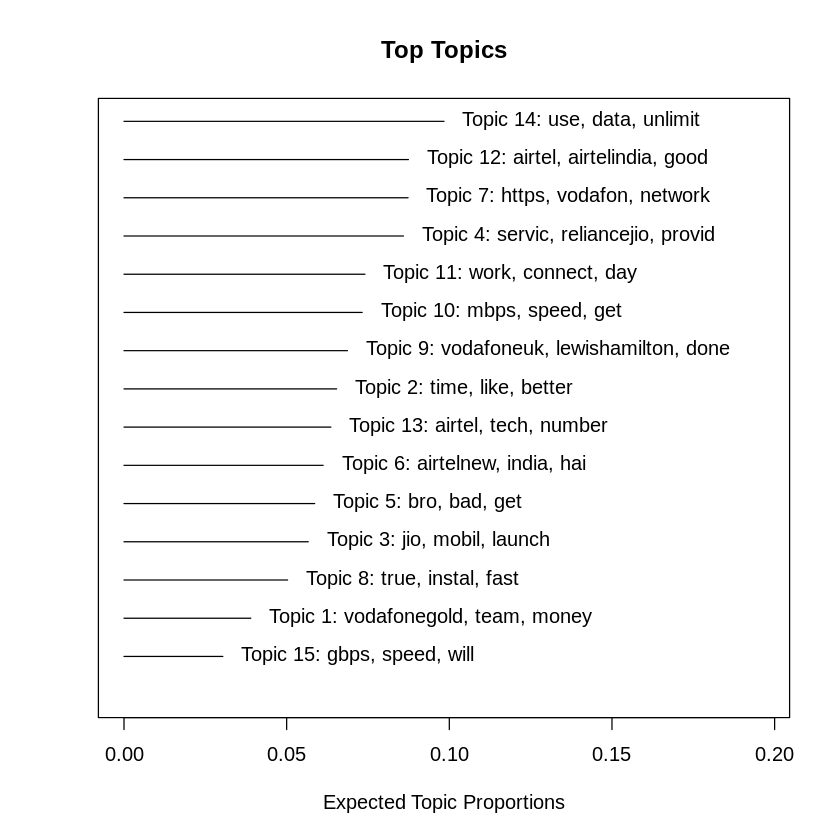

In [15]:
# Load required library
library(stm)

# Set seed for reproducibility
set.seed(831)

# Perform STM with 15 topics and a maximum of 5 EM iterations
system.time({
  First_STM <- stm(docs, vocab, 15,
                   prevalence =~ company + Website,  # Adjust this to match the correct columns in your data
                   data = meta,
                   seed = 15, max.em.its = 5
  )
})

# Plot the first topic model
plot(First_STM)


   user  system elapsed 
 47.614   0.054  47.959 

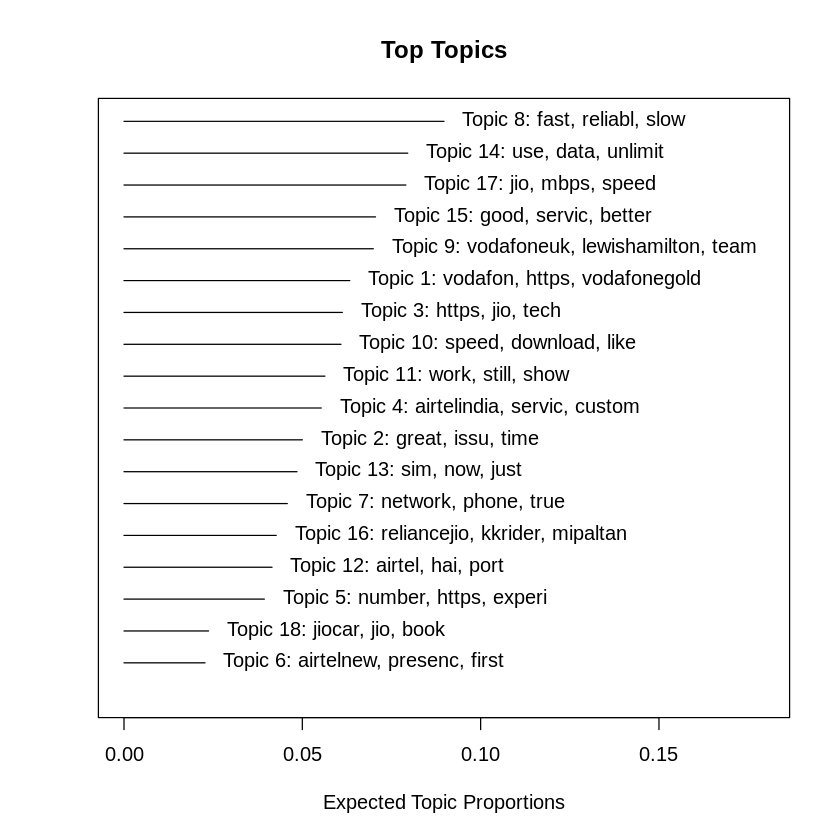

In [16]:
# Load required library
library(stm)

# Set seed for reproducibility
set.seed(832)

# Perform the second STM with 18 topics and a maximum of 75 EM iterations
system.time({
  Second_STM <- stm(documents = out$documents,
                    vocab = out$vocab,
                    K = 18,
                    prevalence =~ company + Website,  # Adjust this to match your actual data columns
                    max.em.its = 75,
                    data = out$meta,
                    init.type = "Spectral",
                    verbose = FALSE
  )
})

# Plot the second topic model
plot(Second_STM)


   user  system elapsed 
980.054   0.444 986.861 

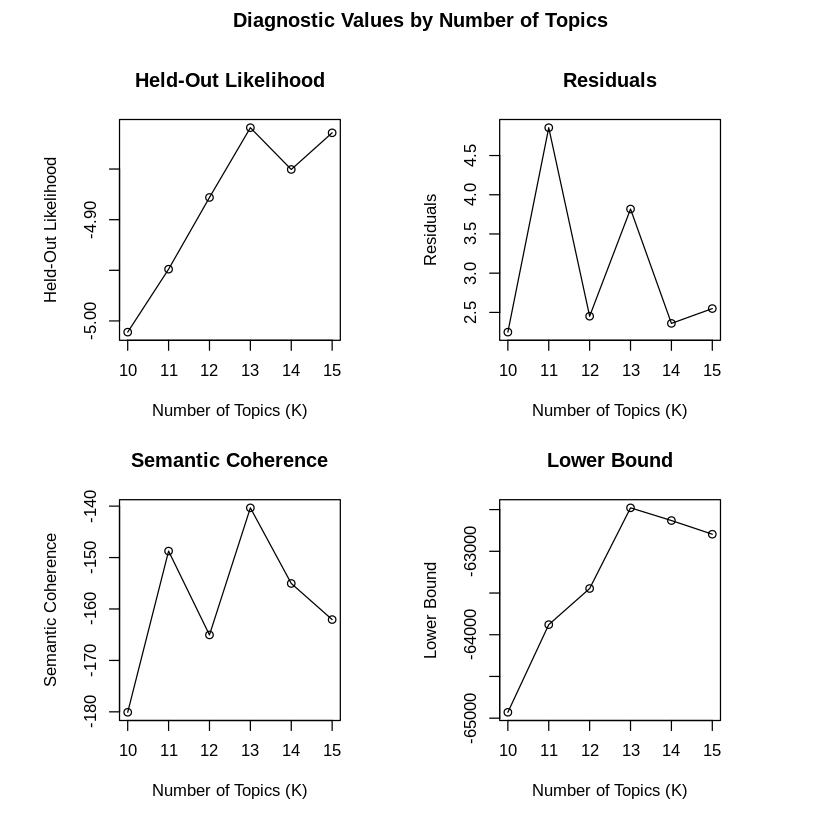

In [17]:
# Load required library
library(stm)

# Set seed for reproducibility
set.seed(833)

# Find the optimal number of topics from 10 to 30
system.time({
    findingk <- searchK(out$documents,
                         out$vocab,
                         K = 10:15,           # Range of topics to test
                         prevalence =~ company + Website, # Adjust to your metadata
                         data = out$meta,
                         verbose = FALSE
    )
})

# Plot the results to visualize the optimal k
plot(findingk)


In [19]:
# Load required library
library(stm)

# Set seed for reproducibility
set.seed(834)

# Find the optimal number of topics with specific parameters
system.time({
    findingk_ver2 <- searchK(documents = out$documents,
                              vocab = out$vocab,
                              K = c(10, 20, 30, 40, 50, 60, 70), # Specify K to try
                              N = 500,  # Matches 10% of documents, adjust if needed
                              proportion = 0.5, # Default proportion of heldout data
                              heldout.seed = 1234, # Optional seed for reproducibility
                              M = 10, # Number of heldout iterations
                              cores = 1, # Number of cores to use (default = 1)
                              prevalence =~ company + Website, # Adjust based on your metadata
                              max.em.its = 75, # Maximum EM iterations
                              data = out$meta, # Metadata
                              init.type = "Spectral", # Initialization method
                              verbose = TRUE # Verbose output
    )
})

# Plot the results to visualize the optimal k
plot(findingk_ver2)


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	..........
	 Recovering initialization...
 	.....
Initialization complete.
.........................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -5.987) 
.........................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -5.786, relative change = 3.354e-02) 
.........................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -5.679, relative change = 1.841e-02) 
.........................................................................................................
Completed E-Step (0 sec

Timing stopped at: 151.5 0.731 153.2



In [22]:
# Load required library
install.packages(c("Rtsne", "rsvd", "geometry"))
library(Rtsne)
library(rsvd)
library(geometry)
library(stm)

# Set seed for reproducibility
set.seed(835)

# Find the optimal number of topics using the Lee-Mimno method
system.time({
    findingk_ver3.lee_mimno <- stm(documents = out$documents,
                                    vocab = out$vocab,
                                    K = 0,  # K=0 to run the Lee-Mimno method
                                    seed = 1234,  # Seed for reproducibility
                                    prevalence =~ company + Website,  # Adjust this based on your metadata
                                    max.em.its = 75,  # Maximum EM iterations
                                    data = out$meta,  # Metadata
                                    init.type = "Spectral",  # Initialization method
                                    verbose = TRUE  # Verbose output
    )
})

# Plot the results to visualize the optimal k
plot(findingk_ver3.lee_mimno)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘abind’, ‘magic’, ‘lpSolve’, ‘linprog’, ‘RcppProgress’




Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 		 Initializing tSNE with PCA...
 		 Using tSNE to project to a low-dimensional space...
 		 Calculating exact convex hull...
 	
	 Recovering initialization...
 	.....
Initialization complete.
.........................................................................................................
Completed E-Step (1 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -5.722) 
.........................................................................................................
Completed E-Step (1 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -5.343, relative change = 6.626e-02) 
.........................................................................................................
Completed E-Step (1 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -5.209, relative change = 2.511e-02) 
............

Timing stopped at: 64.61 0.207 65.29



   user  system elapsed 
 48.956   0.045  49.320 

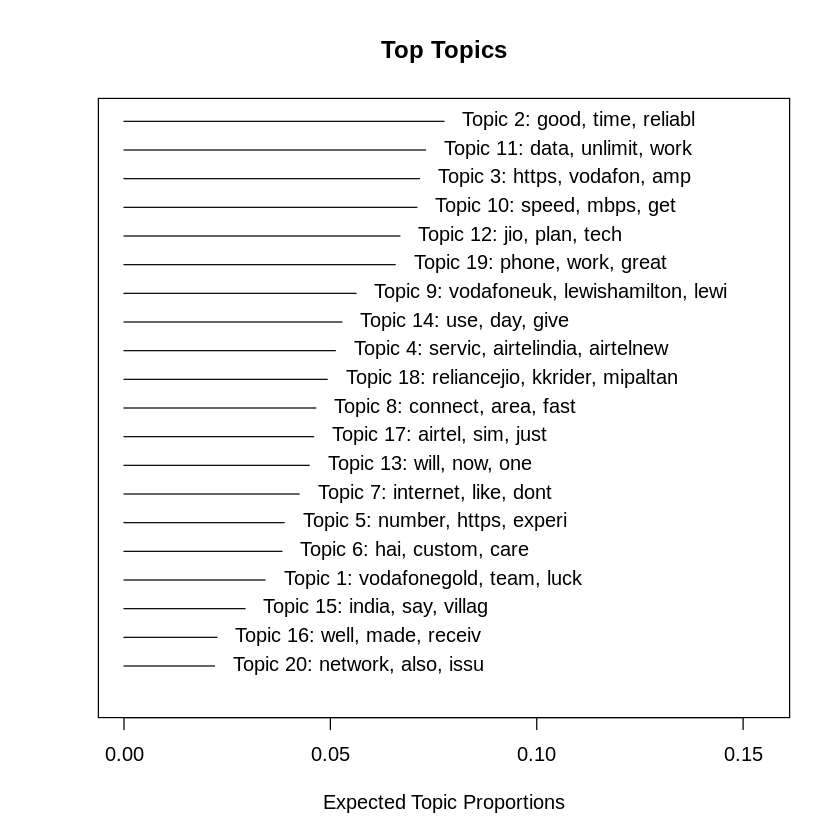

In [23]:
# Run final topic model at 20 topics and see how long it takes
set.seed(836)
system.time({
    Third_STM <- stm(documents = out$documents, vocab = out$vocab,
                  K = 20, prevalence =~ company + Website,
                  max.em.its = 75, data = out$meta,
                  init.type = "Spectral", verbose = FALSE
    )
})

#Plot
plot(Third_STM)

In [24]:
# Top Words
labelTopics(Third_STM)

Topic 1 Top Words:
 	 Highest Prob: vodafonegold, team, luck, done, next, gbr, pari 
 	 FREX: vodafonegold, luck, gbr, pari, team, olymp, done 
 	 Lift: vodafonegold, gbr, luck, medal, pari, olymp, cheer 
 	 Score: vodafonegold, team, luck, gbr, pari, olymp, cheer 
Topic 2 Top Words:
 	 Highest Prob: good, time, reliabl, coverag, occasion, issu, that 
 	 FREX: reliabl, occasion, good, general, coverag, pretti, that 
 	 Lift: server, general, reliabl, occasion, pretti, websit, impress 
 	 Score: good, pretti, reliabl, occasion, coverag, general, websit 
Topic 3 Top Words:
 	 Highest Prob: https, vodafon, amp, launch, network, servic, will 
 	 FREX: vodafon, announc, launch, eslmobileopen, huawei, https, amp 
 	 Lift: vodafon, announc, españa, gamechang, idea, rollout, spain 
 	 Score: vodafon, https, españa, eslmobileopen, huawei, spain, amp 
Topic 4 Top Words:
 	 Highest Prob: servic, airtelindia, airtelnew, provid, worst, cant, connect 
 	 FREX: airtelindia, servic, airtelnew, provid,

In [26]:
# We can find the top documents associated with a topic with the findThoughts function:
# top 2 paragraps for Topic 1 to 10

findThoughts(Third_STM, texts = meta$Comment,n = 2, topics = 1:10)


 Topic 1: 
 	 @VodafoneUK Track, Cycling and Diving, with a host of running events... There are so many places Team GB's next medal might come from!  Let's cheer them on to #Olympics  victory!  and make #Vodafone5golds 🥇happen!

Only 1 gold to go to the next 5! https://t.co/qR3RFOg8XJ
 	@VodafoneUK #Vodafone5golds only five more days until I am in Paris ... OMG I cant wait ... the cycling and synchronised diving yesterday were sooooooooooo exciting &lt;3 
 Topic 2: 
 	 The quick load times on 5G are impressive, but indoor coverage needs improvemen
 	Pretty good 
 Topic 3: 
 	 Vodafone Spain announced Monday that it will launch commercial 5G services in 15 cities across Spain, where Huawei has been responsible for 65% of the 5G network of Vodafone's Spanish subsidiary. Spain will become the 2nd European country with commercial 5G service. https://t.co/MHREHpOKBn
 	Samsung is supporting #OpenRAN innovation with the successful launch of fully virtualized #2G technology, enabling rapid ne

In [27]:
# We can look at multiple, or all, topics this way as well.
# For this we’ll just look at the shorttext.
# top 3 paragraps for Topic #1 to 15

findThoughts(Third_STM, texts = meta$Comment,n = 3, topics = 1:15)


 Topic 1: 
 	 @VodafoneUK Track, Cycling and Diving, with a host of running events... There are so many places Team GB's next medal might come from!  Let's cheer them on to #Olympics  victory!  and make #Vodafone5golds 🥇happen!

Only 1 gold to go to the next 5! https://t.co/qR3RFOg8XJ
 	@VodafoneUK #Vodafone5golds only five more days until I am in Paris ... OMG I cant wait ... the cycling and synchronised diving yesterday were sooooooooooo exciting &lt;3
 	@VodafoneUK This could be it! Between Track, Keirin, Taekwondo and Omnium #Olympics finals, Team GB have a real chance of #Vodafone5golds !🏅Let's cheer them on! https://t.co/7IQUsofg3o 
 Topic 2: 
 	 The quick load times on 5G are impressive, but indoor coverage needs improvemen
 	Pretty good
 	Mostly good, but not without issues. 
 Topic 3: 
 	 Vodafone Spain announced Monday that it will launch commercial 5G services in 15 cities across Spain, where Huawei has been responsible for 65% of the 5G network of Vodafone's Spanish subsid

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




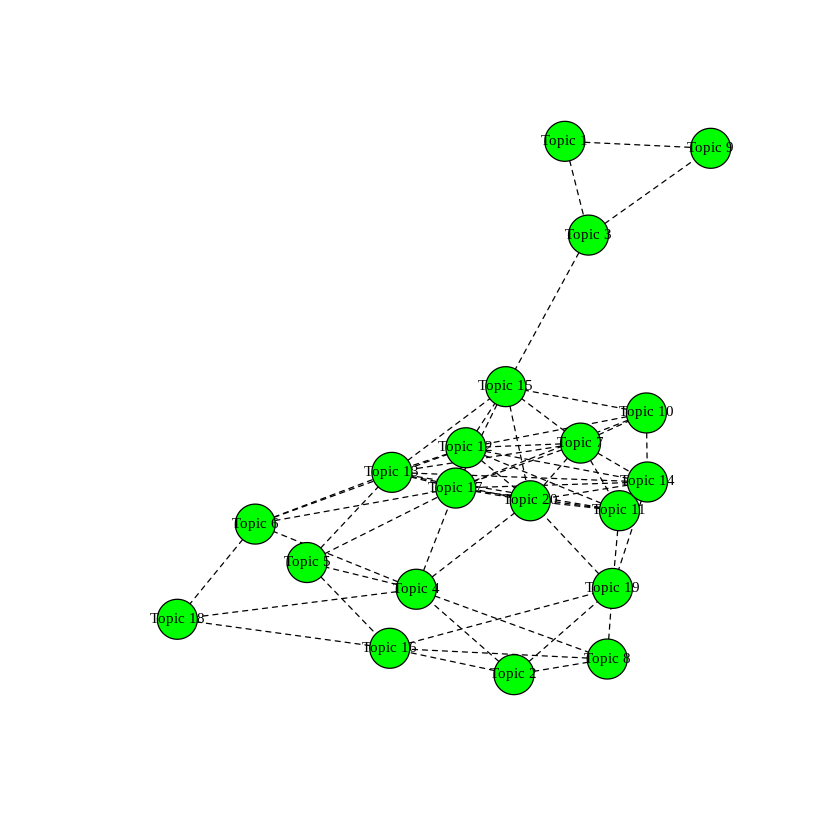

In [29]:

# Graphical display of topic correlations
install.packages("igraph")
library(igraph)

topic_correlation<-topicCorr(Third_STM)
plot(topic_correlation)

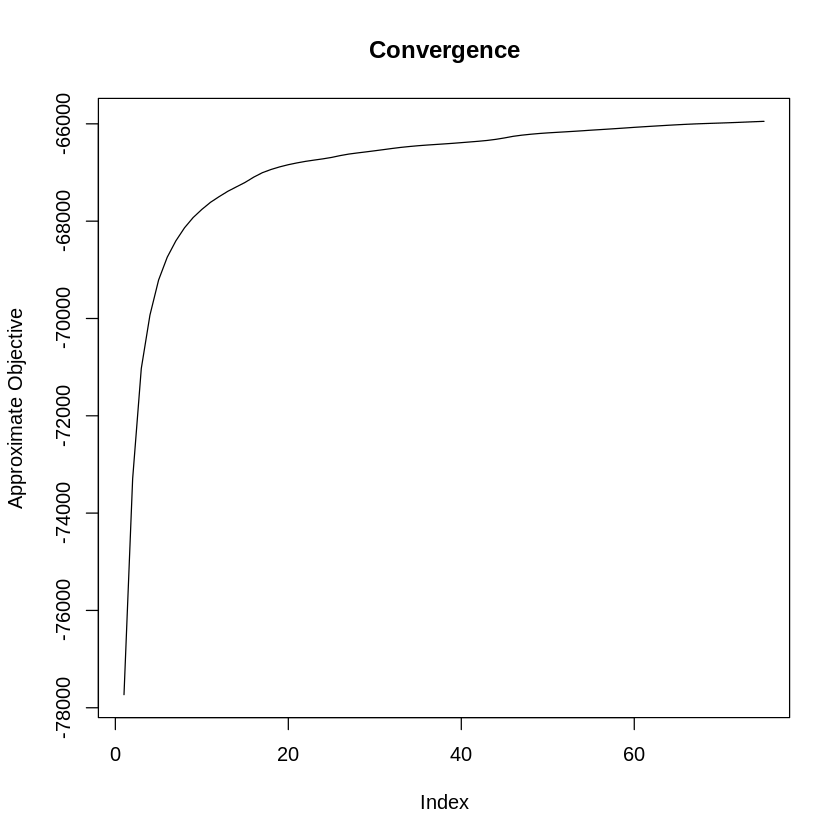

In [30]:
# Graphical display of convergence

plot(Third_STM$convergence$bound, type = "l",
         ylab = "Approximate Objective",
         main = "Convergence")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: RColorBrewer



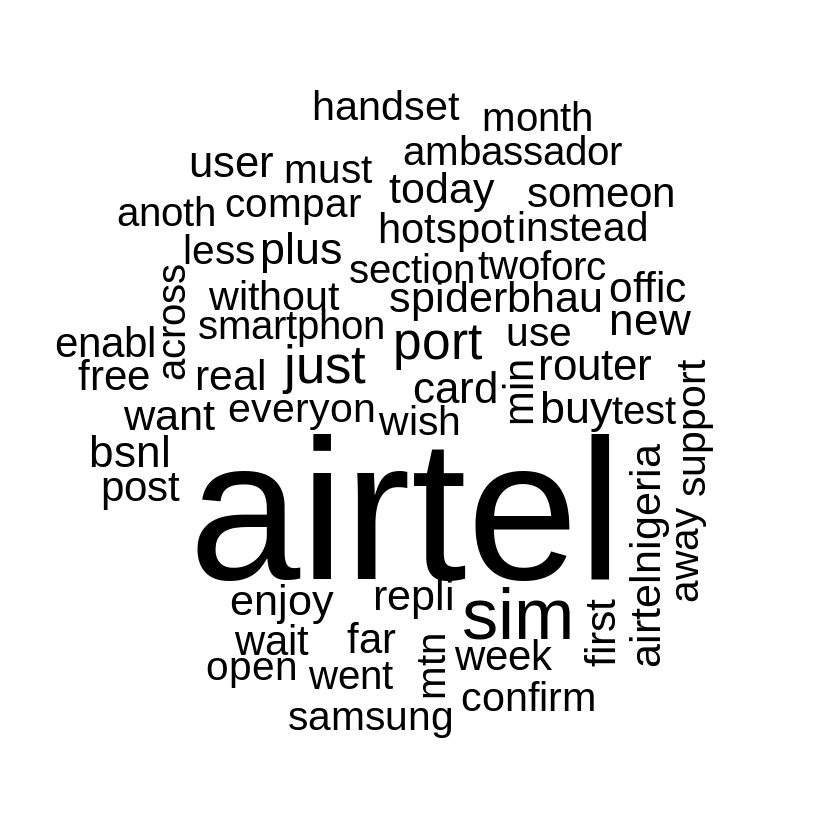

In [32]:
# Wordcloud:topic 17 with word distribution
install.packages("wordcloud")
library(wordcloud)

set.seed(837)
cloud(Third_STM, topic=17, scale=c(10,2))

In [38]:
print(Third_STM$settings$dim$K)


[1] 20


In [39]:
str(predict_topics)


List of 8
 $ parameters :List of 10
  ..$ :List of 25
  .. ..$ :List of 2
  .. .. ..$ est : Named num [1:6] -0.01369 -0.00205 0.12107 0.0131 0.04772 ...
  .. .. .. ..- attr(*, "names")= chr [1:6] "(Intercept)" "companyJio" "companyVodafone" "Websitesurvey" ...
  .. .. ..$ vcov: num [1:6, 1:6] 6.23e-05 -1.11e-05 -1.09e-05 -5.62e-05 -5.49e-05 ...
  .. ..$ :List of 2
  .. .. ..$ est : Named num [1:6] -0.013077 -0.000754 0.127446 0.011798 0.045768 ...
  .. .. .. ..- attr(*, "names")= chr [1:6] "(Intercept)" "companyJio" "companyVodafone" "Websitesurvey" ...
  .. .. ..$ vcov: num [1:6, 1:6] 5.91e-05 -1.05e-05 -1.04e-05 -5.33e-05 -5.20e-05 ...
  .. ..$ :List of 2
  .. .. ..$ est : Named num [1:6] -0.00552 -0.00219 0.10984 0.00616 0.03534 ...
  .. .. .. ..- attr(*, "names")= chr [1:6] "(Intercept)" "companyJio" "companyVodafone" "Websitesurvey" ...
  .. .. ..$ vcov: num [1:6, 1:6] 4.95e-05 -8.80e-06 -8.68e-06 -4.47e-05 -4.36e-05 ...
  .. ..$ :List of 2
  .. .. ..$ est : Named num [1:6] -0.010

[1] "Comment"   "Website"   "Sentiment" "company"  


[1] "Airtel"   "Jio"      "Vodafone"

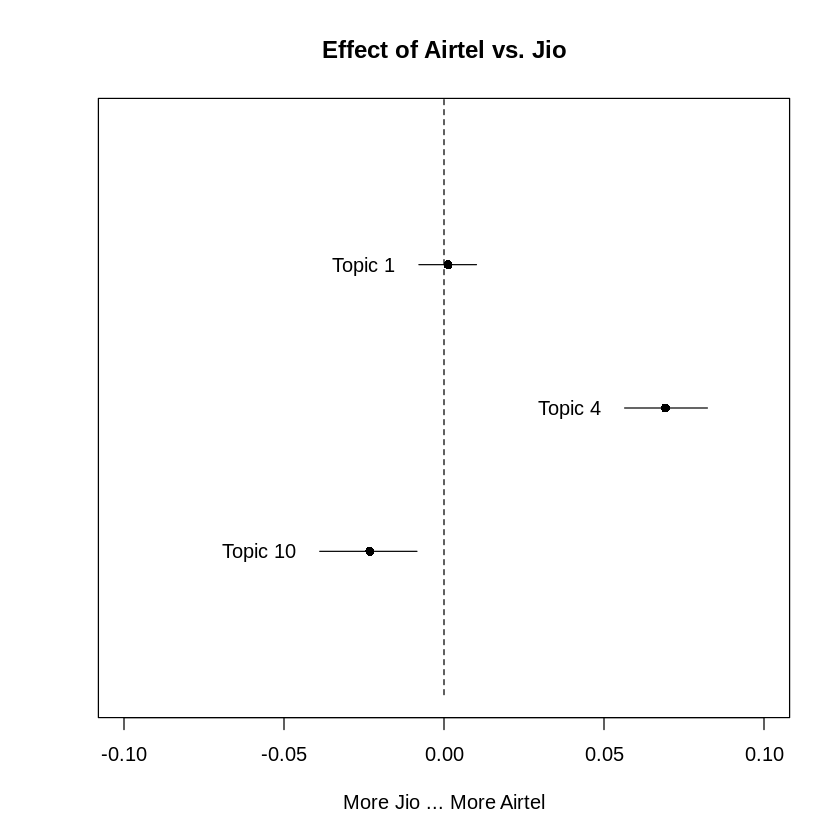

In [62]:
print(names(out$meta))
out$meta$company <- as.factor(out$meta$company)
out$meta$Website <- as.factor(out$meta$Website)
predict_topics <- estimateEffect(formula = 1:10 ~ company + Website,
                                 stmobj = Third_STM,
                                 metadata = out$meta,
                                 uncertainty = "Global",
                                 prior = 1e-5)
# Use the actual levels of company in the data
levels(out$meta$company)
set.seed(837)
plot(predict_topics,
     covariate = "company",
     topics = c(1, 4, 10),
     model = Third_STM,
     method = "difference",
     cov.value1 = "Airtel",  # Change to an actual level in your data
     cov.value2 = "Jio",     # Change to an actual level in your data
     xlab = "More Jio ... More Airtel",
     main = "Effect of Airtel vs. Jio",
     xlim = c(-.1, .1),
     labeltype = "custom",
     custom.labels = c('Topic 1', 'Topic 4', 'Topic 10'))


[1] "Airtel"   "Jio"      "Vodafone"

List of 8
 $ parameters :List of 10
  ..$ :List of 25
  .. ..$ :List of 2
  .. .. ..$ est : Named num [1:6] -0.01302 -0.00149 0.12021 0.01235 0.04315 ...
  .. .. .. ..- attr(*, "names")= chr [1:6] "(Intercept)" "companyJio" "companyVodafone" "Websitesurvey" ...
  .. .. ..$ vcov: num [1:6, 1:6] 5.63e-05 -1.00e-05 -9.88e-06 -5.08e-05 -4.96e-05 ...
  .. ..$ :List of 2
  .. .. ..$ est : Named num [1:6] -0.00893 -0.00233 0.10258 0.00902 0.03832 ...
  .. .. .. ..- attr(*, "names")= chr [1:6] "(Intercept)" "companyJio" "companyVodafone" "Websitesurvey" ...
  .. .. ..$ vcov: num [1:6, 1:6] 4.69e-05 -8.33e-06 -8.22e-06 -4.23e-05 -4.13e-05 ...
  .. ..$ :List of 2
  .. .. ..$ est : Named num [1:6] -0.01318 -0.00183 0.12097 0.01283 0.04447 ...
  .. .. .. ..- attr(*, "names")= chr [1:6] "(Intercept)" "companyJio" "companyVodafone" "Websitesurvey" ...
  .. .. ..$ vcov: num [1:6, 1:6] 5.68e-05 -1.01e-05 -9.96e-06 -5.12e-05 -5.00e-05 ...
  .. ..$ :List of 2
  .. .. ..$ est : Named num [1:6] -0.0124 -0

[1]  1  2  3  4  5  6  7  8  9 10

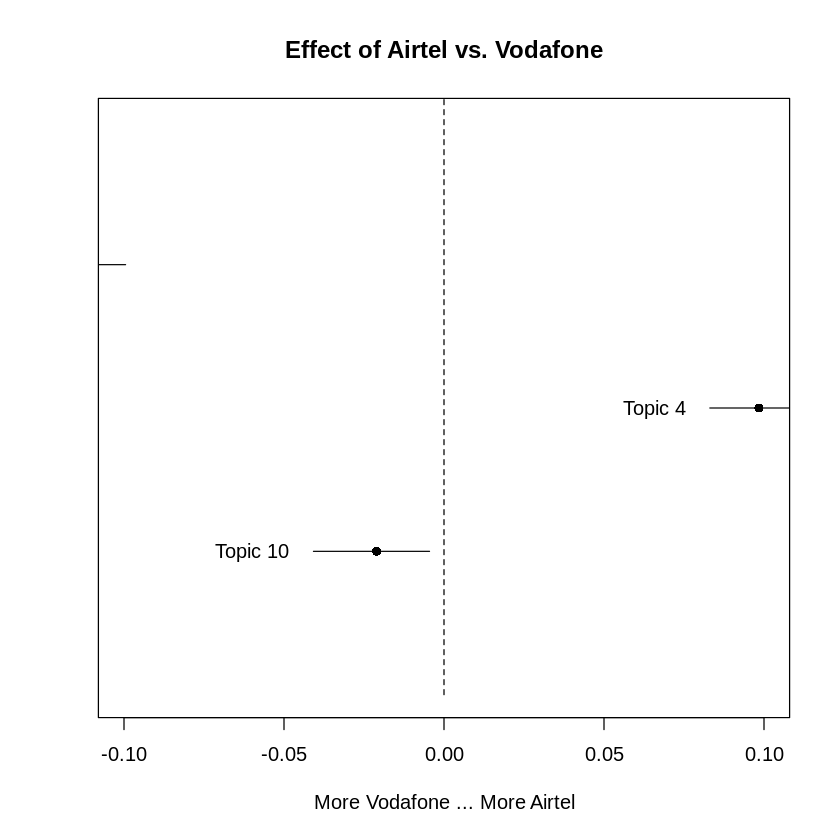

In [72]:
# Check the levels of the 'company' variable
levels(out$meta$company)  # This should include 'Airtel', 'Jio', and 'Vodafone'
# Check the structure of predict_topics
str(predict_topics)
# Check which topics were estimated
unique(predict_topics$topic)  # This should include 1, 4, and 10

# Ensure the covariate values are valid levels
# set.seed(837)
# plot(predict_topics,
#      covariate = "company",
#      topics = c(1, 4, 10),
#      model = Third_STM,
#      method = "difference",
#      cov.value1 = "Airtel",  # Replace with valid levels
#      cov.value2 = "Jio",     # Replace with valid levels
#      xlab = "More Jio ... More Airtel",
#      main = "Effect of Airtel vs. Jio",
#      xlim = c(-0.1, 0.1),
#      labeltype = "custom",
#      custom.labels = c('Topic 1', 'Topic 4', 'Topic 10'))

# Ensure the covariate values are valid levels
set.seed(837)
plot(predict_topics,
     covariate = "company",
     topics = c(1, 4, 10),
     model = Third_STM,
     method = "difference",
     cov.value1 = "Airtel",     # Set to Airtel
     cov.value2 = "Vodafone",   # Change to Vodafone
     xlab = "More Vodafone ... More Airtel",
     main = "Effect of Airtel vs. Vodafone",
     xlim = c(-0.1, 0.1),
     labeltype = "custom",
     custom.labels = c('Topic 1', 'Topic 4', 'Topic 10'))



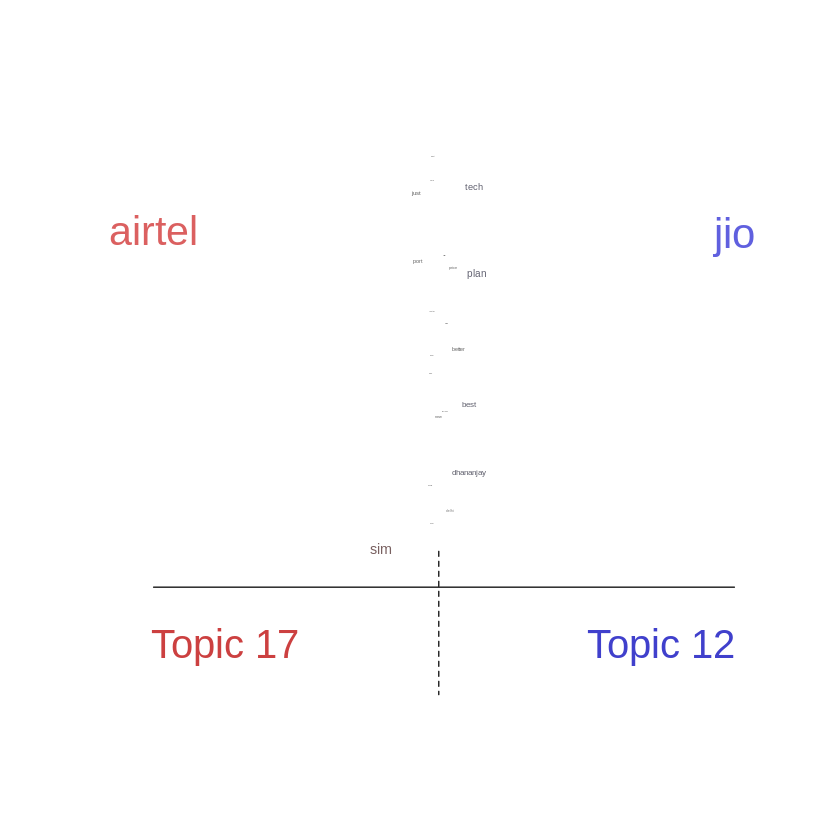

In [69]:
set.seed(831)
plot(Third_STM,
     type="perspectives",
     topics=c(17,12),
     plabels = c("Topic 17","Topic 12"))

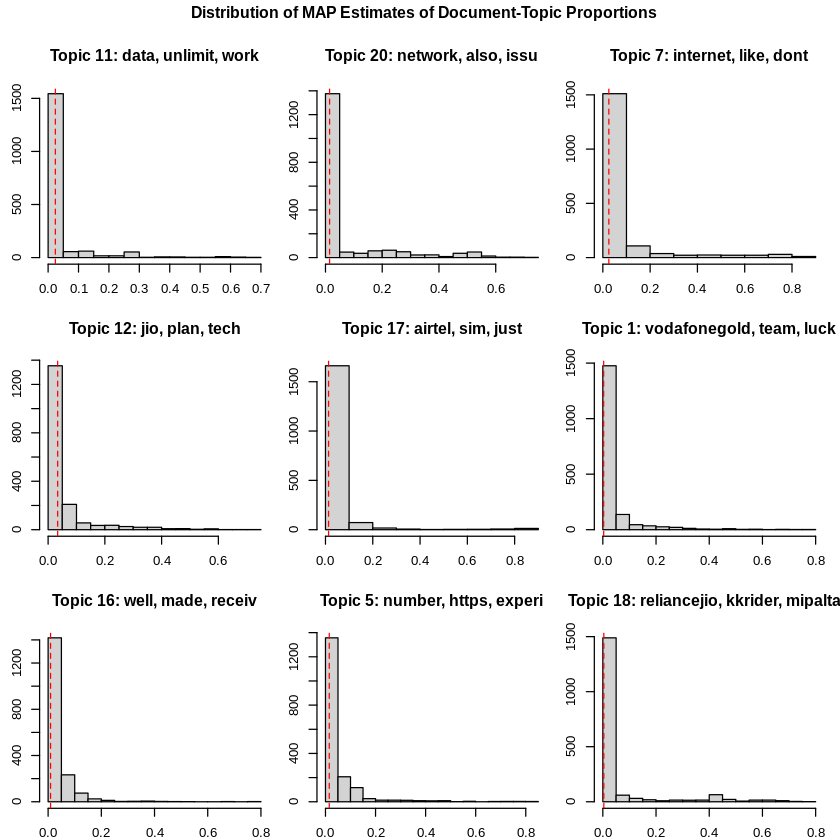

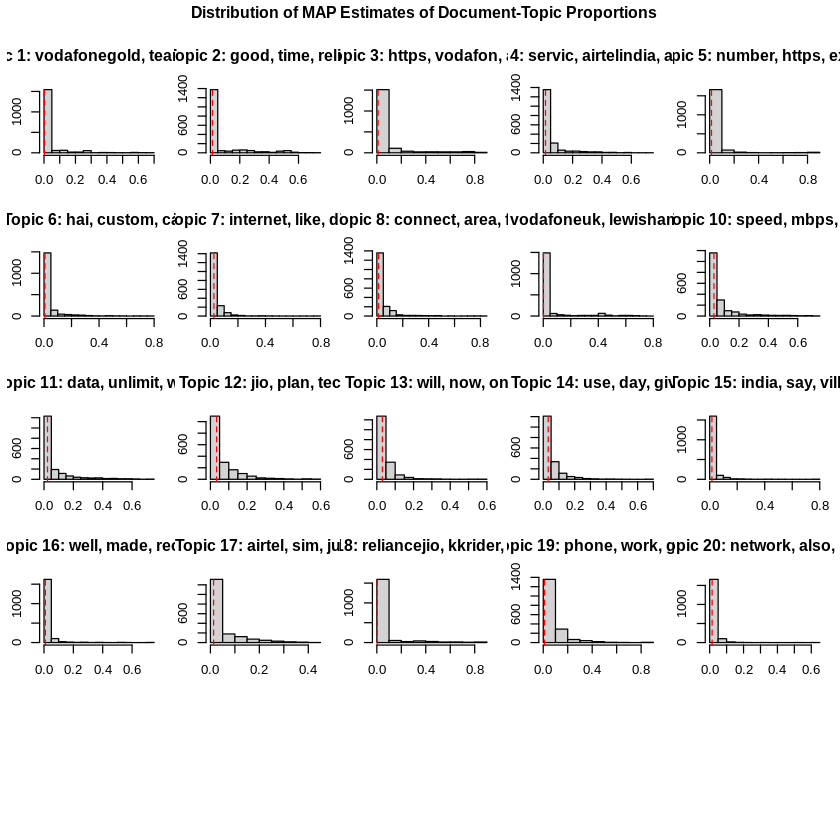

In [70]:
# Topic proportions

plot(Third_STM, type = "hist", topics = sample(1:20, size = 9))
plot(Third_STM, type="hist")

 [1] -183.79932 -238.59616 -146.47974 -130.49783  -87.41892 -150.19125
 [7] -148.29146 -247.30895 -190.33455 -180.70121 -117.27190 -176.52522
[13] -141.67383 -196.33471 -168.15106 -193.97637 -199.18954 -104.57242
[19] -198.64260 -192.90446
 [1] 9.805491 9.789553 9.592418 9.822372 9.757461 9.545162 9.789829 9.798959
 [9] 9.763760 9.844497 9.756410 9.879984 9.657403 9.773209 9.749538 9.824035
[17] 9.818299 9.795084 9.706687 9.894341


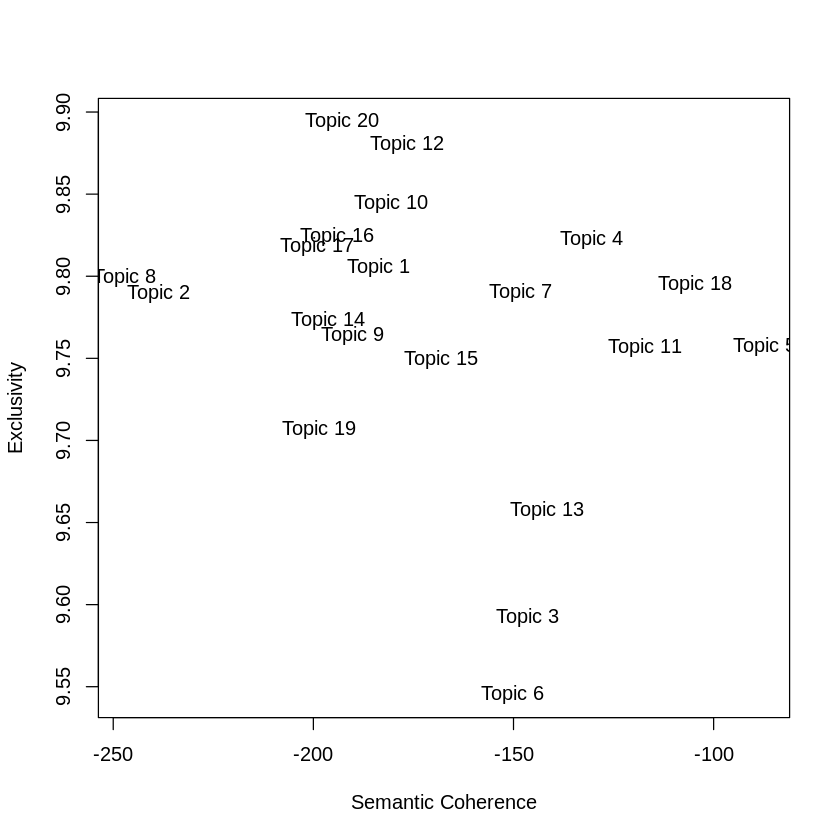

In [71]:
# The topicQuality() function plots these values
# and labels each with its topic number:

topicQuality(model=Third_STM, documents=docs)